<a href="https://colab.research.google.com/github/Ankitd04/python_code/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Image Classification with Tensorflow**

Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Import the Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel Boot']

## **Preprocess The Data**

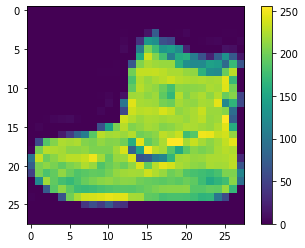

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

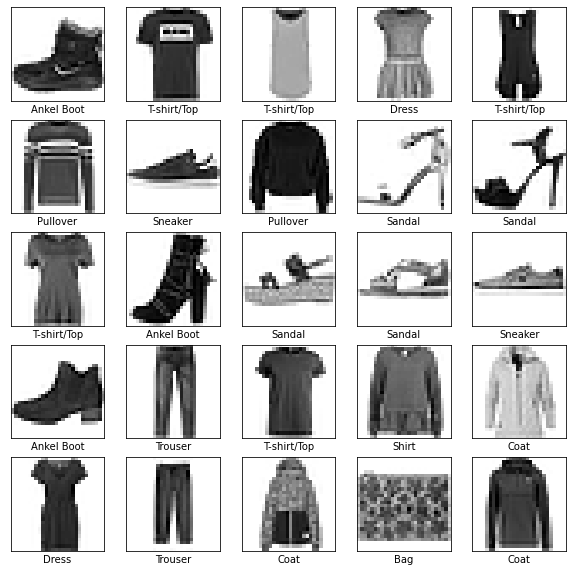

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## **Building Model**

### **Setting up layers**

In [12]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10)
])

### **Compiling the Model**

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### **Training Model**

In [14]:
#fitting the model
model.fit(train_images, train_labels, epochs=10)

#evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy : ', test_acc)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6362 - accuracy: 0.7798
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3749 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3285 - accuracy: 0.8824
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3096 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2921 - accuracy: 0.8938
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2773 - accuracy: 0.8986
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2614 - accuracy: 0.9023
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2593 - accuracy: 0.9025
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2445 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.227

In [15]:
#Make Predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
predictions[0]

array([1.5365798e-06, 2.2183077e-08, 1.6325963e-10, 1.7347121e-08,
       2.2422311e-08, 3.2537573e-03, 2.1850556e-06, 8.2236882e-03,
       3.3010725e-08, 9.8851877e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
class_names[np.argmax(predictions[0])]

'Ankel Boot'

Function to plot our predictions

In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label],
                                       color=color))
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## **Verify Predictions**

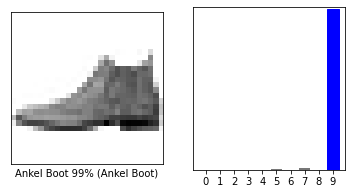

In [19]:
#let's look at the 0th frame of the predictions and the prediction table

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

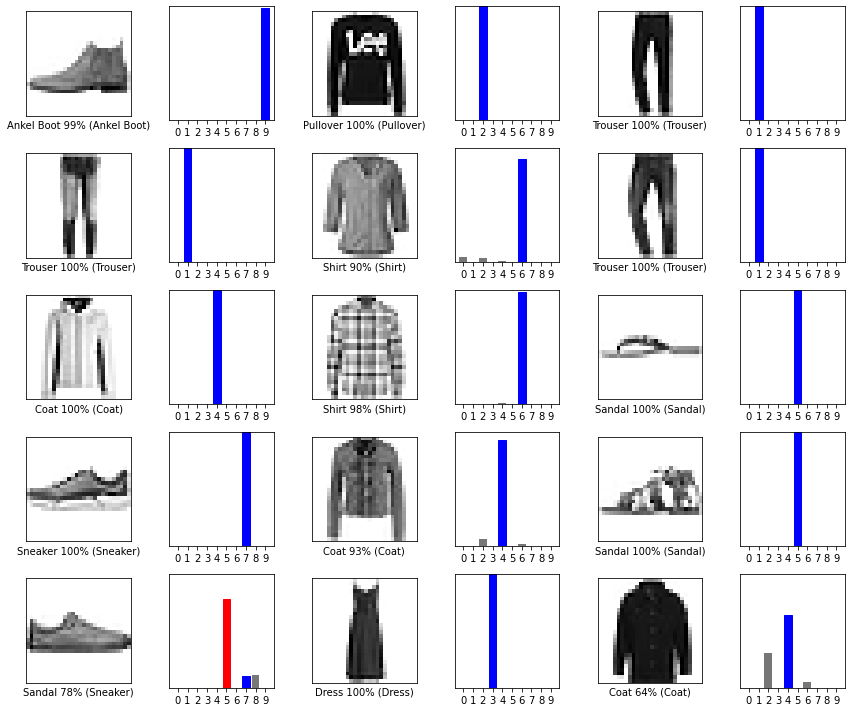

In [20]:
#Plot the first X test images, their predicted labels, and the true label
#Color correct predictions in the blue and incorrect predictions in red

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()